# Forecasting part of course work

## Create a serie for data

In [14]:
import pandas as pd

humidity_file = '../dataClean/humidity.csv'
humidity_data = pd.read_csv(humidity_file, index_col=0, parse_dates=True)
humidity_df = pd.DataFrame(humidity_data)

vancouver_humidity_serie = humidity_df[['Vancouver']].iloc[0:24*365]
vancouver_humidity_serie.head()

,Vancouver
datetime,
2012-10-01 12:00:00,82
2012-10-01 13:00:00,76
2012-10-01 14:00:00,76
2012-10-01 15:00:00,76
2012-10-01 16:00:00,77


## Visualize data to linear plot

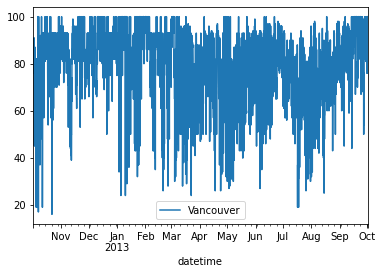

In [19]:
from matplotlib import pyplot as plt

vancouver_humidity_serie.plot()
plt.figaspect(3.)
plt.show()

# Create AR model for learning and saving

In [20]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy as np

# find difference between current and previous object of dataset
def find_diff(dst):
    diff = []
    for i in range(1, len(dst)):
        value = dst[i] - dst[i-1]
        diff.append(value)

    return np.array(diff)


# Predict, give regression coefficients and lagged(zapazd) observations
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]

    return yhat





## Set training and testing data

In [23]:
X = find_diff(vancouver_humidity_serie.values)

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# Train autoregression model
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params

# iterate over time steps in test
history = [x for x in train]
predictions = []
for t_idx in range(len(test)):
    yhat = predict(coef, history)
    observation = test[t_idx]
    predictions.append(yhat)
    history.append(observation)

    print(f'observation: {observation}, prediction: {yhat}')

tion: [0.00160972]
observation: [0], prediction: [-0.29702162]
observation: [-2], prediction: [0.08114905]
observation: [0], prediction: [0.92982567]
observation: [10], prediction: [0.39251317]
observation: [-15], prediction: [-4.55296908]
observation: [-3], prediction: [4.64124047]
observation: [-1], prediction: [4.49373893]
observation: [-2], prediction: [1.49045709]
observation: [-2], prediction: [2.46452721]
observation: [1], prediction: [3.51326791]
observation: [-3], prediction: [0.68217992]
observation: [1], prediction: [1.708516]
observation: [5], prediction: [0.68544545]
observation: [-1], prediction: [-2.20826931]
observation: [3], prediction: [-0.65444532]
observation: [-7], prediction: [-1.47681836]
observation: [0], prediction: [1.81576165]
observation: [4], prediction: [1.14483146]
observation: [2], prediction: [-1.41892052]
observation: [0], prediction: [-1.36193562]
observation: [0], prediction: [-0.2146182]
observation: [7], prediction: [-0.7456643]
observation: [7], p

## Calculate mean error

In [24]:
error = mean_squared_error(test, predictions)
error

53.843449191852265

## Build a plot

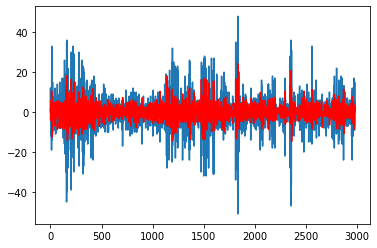

In [25]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Create ARIMA model and predictions

## Prepare to analyze

In [33]:
X = vancouver_humidity_serie.values
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]

# Prediction arrays data
history = [x for x in train]
predictions = []
prediction_result = [x for x in train]

## Walkthrough over data and forecasting

In [34]:
from statsmodels.tsa.arima.model import ARIMA

for t_idx in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) # generate model
    model_fit = model.fit() # fit->learn
    output = model_fit.forecast()

    yhat = output[0]  # prediction
    predictions.append(yhat)

    observation = test[t_idx]  # expectation
    history.append(observation)

    print(f'predicted: {yhat}, expected: {observation}')

2, expected: [75]
predicted: 76.02578922616142, expected: [73]
predicted: 74.95730925889875, expected: [71]
predicted: 73.65769178053273, expected: [72]
predicted: 72.41248435859521, expected: [69]
predicted: 70.45123271828584, expected: [70]
predicted: 70.47132506385563, expected: [75]
predicted: 72.85914722272447, expected: [74]
predicted: 73.5195207803462, expected: [77]
predicted: 75.74008899098911, expected: [70]
predicted: 71.89949008533802, expected: [70]
predicted: 71.05702390549357, expected: [74]
predicted: 72.48334085789178, expected: [76]
predicted: 74.73480013163322, expected: [76]
predicted: 75.82087727128024, expected: [76]
predicted: 75.50945349318323, expected: [83]
predicted: 79.52756808152242, expected: [90]
predicted: 85.36648764961289, expected: [91]
predicted: 88.67161138795359, expected: [91]
predicted: 89.72478976504752, expected: [91]
predicted: 89.80979882602908, expected: [90]
predicted: 89.85575854465132, expected: [93]
predicted: 91.85363447020057, expected

## Evaluate forecasting

In [35]:
from math import sqrt

root_mean_squared_error = sqrt(mean_squared_error(test, predictions))
root_mean_squared_error

7.026780492847404

## Compare forecasts and observations with plot 

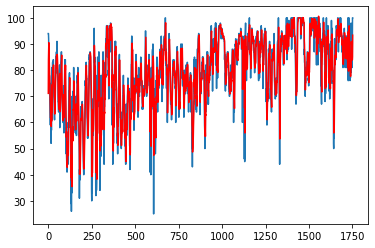

In [43]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Implement Simple Exponential Smoothing

## Prepare methods for smoothing

In [56]:
from statsmodels.tsa.api import SimpleExpSmoothing

fit = SimpleExpSmoothing(vancouver_humidity_serie, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)

forecast = fit.forecast().rename('alpha=0.6')
forecast

2013-10-01 12:00:00    97.543063
Freq: H, Name: alpha=0.6, dtype: float64

## Evaluate error

In [72]:


counter = 0
arrErr = []
for x in vancouver_humidity_serie.values:
    err = x[0] - fit.fittedvalues.values[counter]
    arrErr.append(err)
    counter += 1

np.array(arrErr).mean()

0.0038577619301314835

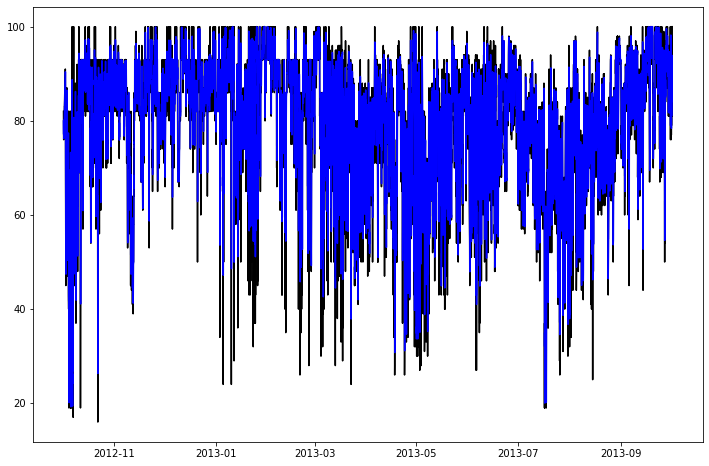

In [47]:
plt.figure(figsize=(12,8))
plt.plot(vancouver_humidity_serie, color='black')
plt.plot(fit.fittedvalues, color='blue')
plt.show()